Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('D:/mlproject/notebook/data/stud.csv')

In [9]:
#data shape
df.shape

(1000, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
# df.columns[:-1]

In [10]:
#overview of the data
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [59]:
#missing values
missing = df.isnull().sum()
missing

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [60]:
#duplicates
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

In [61]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [63]:
#unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [57]:
for cols in df.columns[:5]:
    unique_values=df[cols].unique()
    unique_count=len(unique_values)

    print(f"{cols} Unique values count: {unique_count}")
    print(f"{cols} column unique values: {unique_values}\n")

gender Unique values count: 2
gender column unique values: ['female' 'male']

race/ethnicity Unique values count: 5
race/ethnicity column unique values: ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education Unique values count: 6
parental level of education column unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch Unique values count: 2
lunch column unique values: ['standard' 'free/reduced']

test preparation course Unique values count: 2
test preparation course column unique values: ['none' 'completed']



In [64]:
#statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


EDA

In [65]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
numerical = df.select_dtypes(include=['float64','int64'])
categorical= df.select_dtypes(include=['object'])




In [70]:
#divide the features into categorical and numerical features
numerical_features=[]
categorical_features=[]
for features in df.columns:
    if df[features].dtype in ['int64','float64']:
        numerical_features.append(features)
    elif df[features].dtype in ['object']:
        categorical_features.append(features)


print(numerical_features)
print(categorical_features)


['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Feature Engineering

Add total score

Add average score

In [74]:
#Total score = math+read+writing score
#average score = sum(fx)/n
df['total_score']=df['math score'] + df['reading score'] + df['writing score']
df['average_score']= round(df['total_score']/3,4)

In [75]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.6667
1,female,group C,some college,standard,completed,69,90,88,247,82.3333
2,female,group B,master's degree,standard,none,90,95,93,278,92.6667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3333
4,male,group C,some college,standard,none,76,78,75,229,76.3333


Visualization

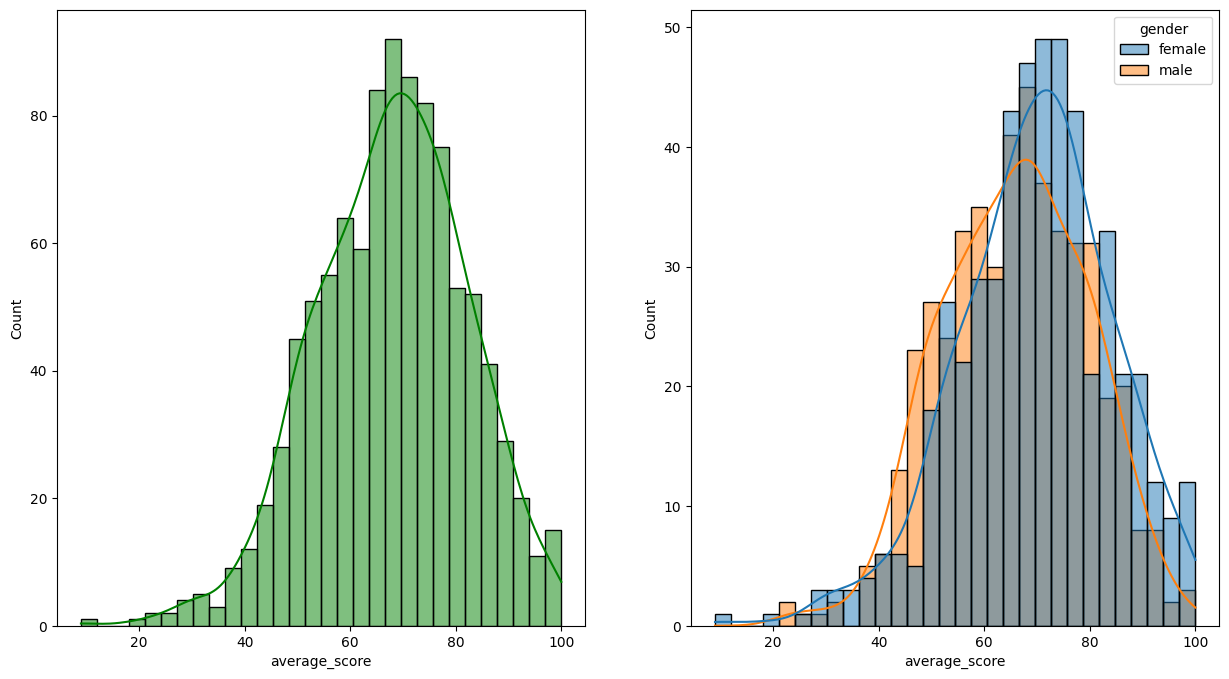

In [91]:
fig, axs = plt.subplots(1,2, figsize=[15,8])
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True, hue='gender')
plt.show()

insights
On average female students perform better than males


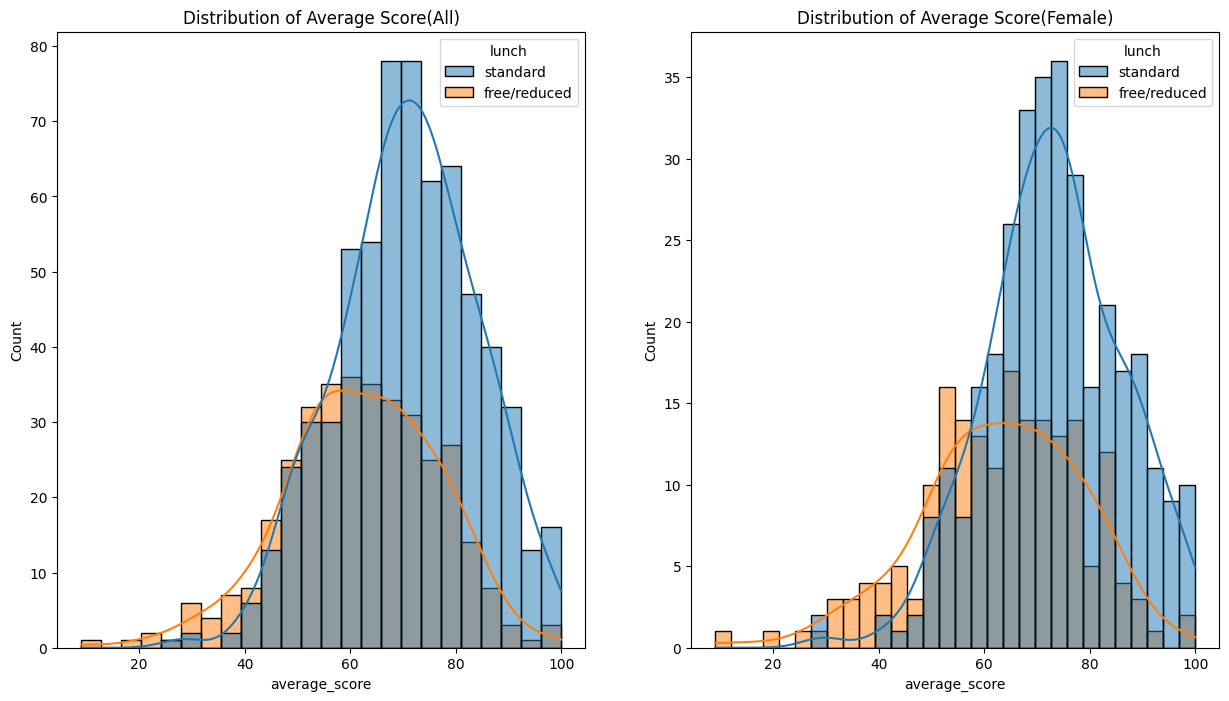

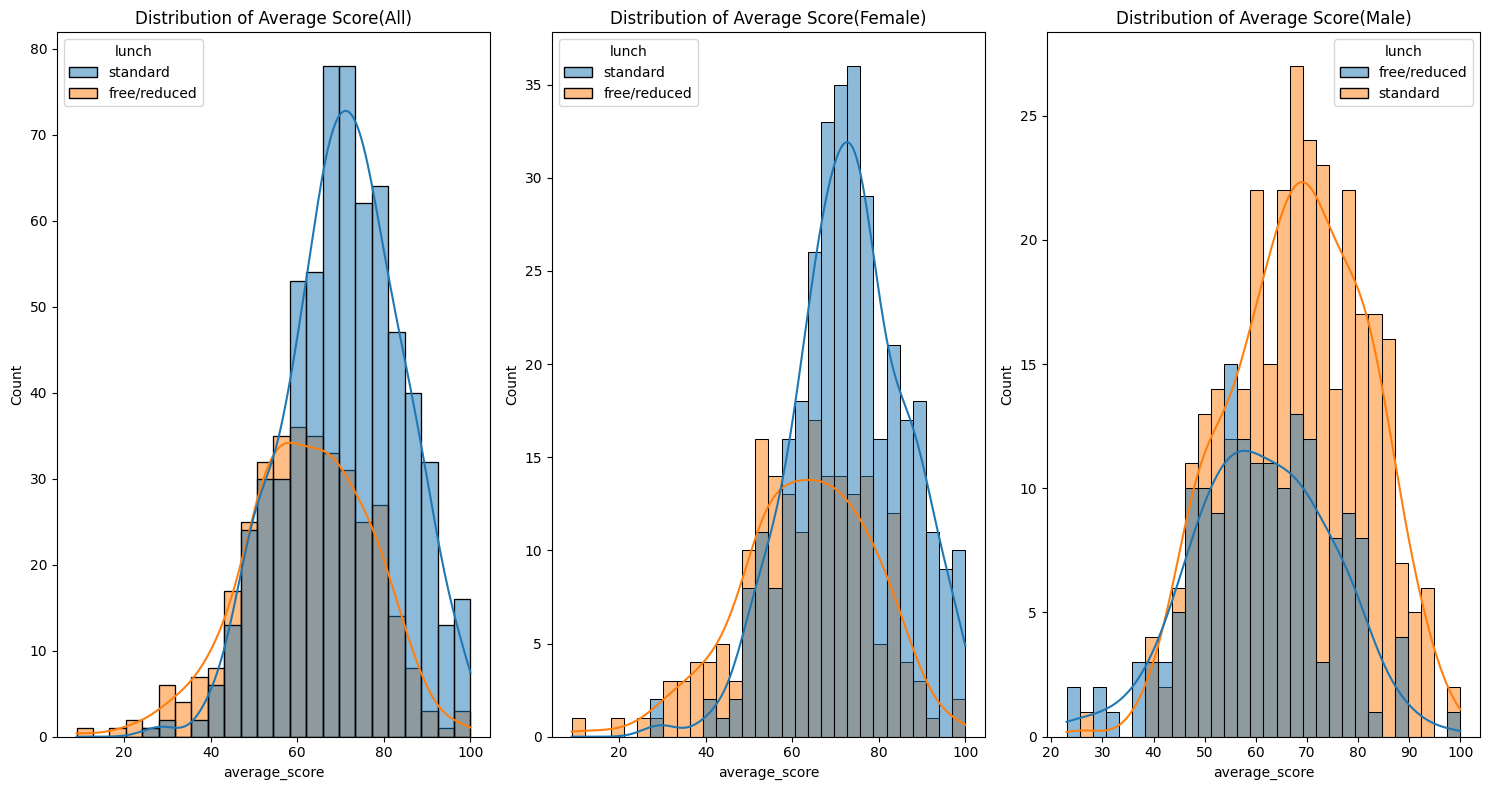

In [105]:
#lunch 
fig, axs = plt.subplots(1,3, figsize=[15,8])
# plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch',color='g',ax=axs[0])
axs[0].set_title("Distribution of Average Score(All)")
# plt.subplot(122)
sns.histplot(data=df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='lunch',ax=axs[1])
axs[1].set_title("Distribution of Average Score(Female)")
# plt.subplot(123)
sns.histplot(data=df[df['gender']=='male'],x='average_score',bins=30,kde=True, hue='lunch',ax=axs[2])
axs[2].set_title("Distribution of Average Score(Male)")
plt.tight_layout()
plt.show()

In [106]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.6667
1,female,group C,some college,standard,completed,69,90,88,247,82.3333
2,female,group B,master's degree,standard,none,90,95,93,278,92.6667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3333
4,male,group C,some college,standard,none,76,78,75,229,76.3333


On average students enrolled in the standard lunch program perform better

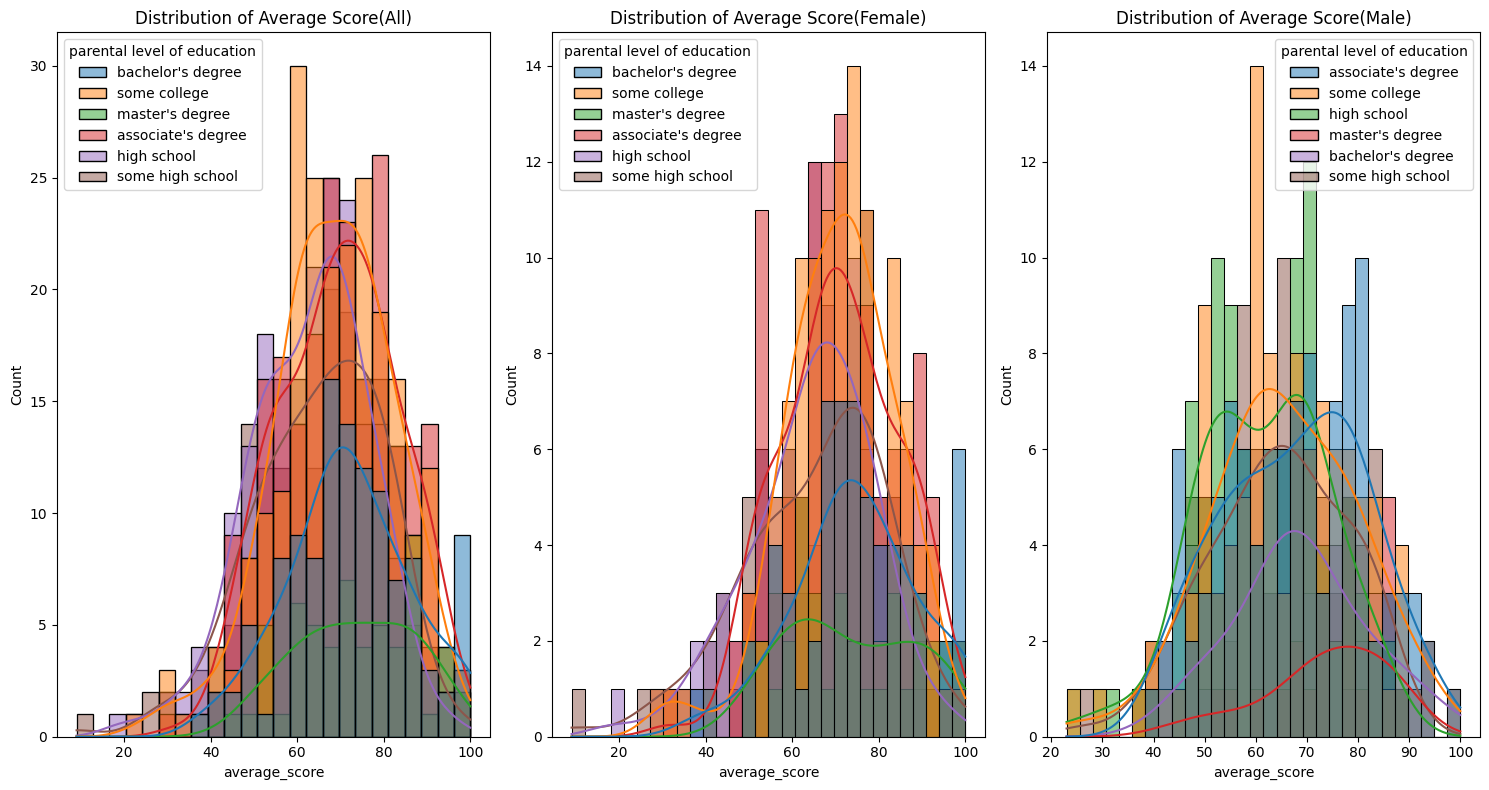

In [107]:
#parental level of education
#lunch 
fig, axs = plt.subplots(1,3, figsize=[15,8])
# plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education',color='g',ax=axs[0])
axs[0].set_title("Distribution of Average Score(All)")
# plt.subplot(122)
sns.histplot(data=df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='parental level of education',ax=axs[1])
axs[1].set_title("Distribution of Average Score(Female)")
# plt.subplot(123)
sns.histplot(data=df[df['gender']=='male'],x='average_score',bins=30,kde=True, hue='parental level of education',ax=axs[2])
axs[2].set_title("Distribution of Average Score(Male)")
plt.tight_layout()
plt.show()

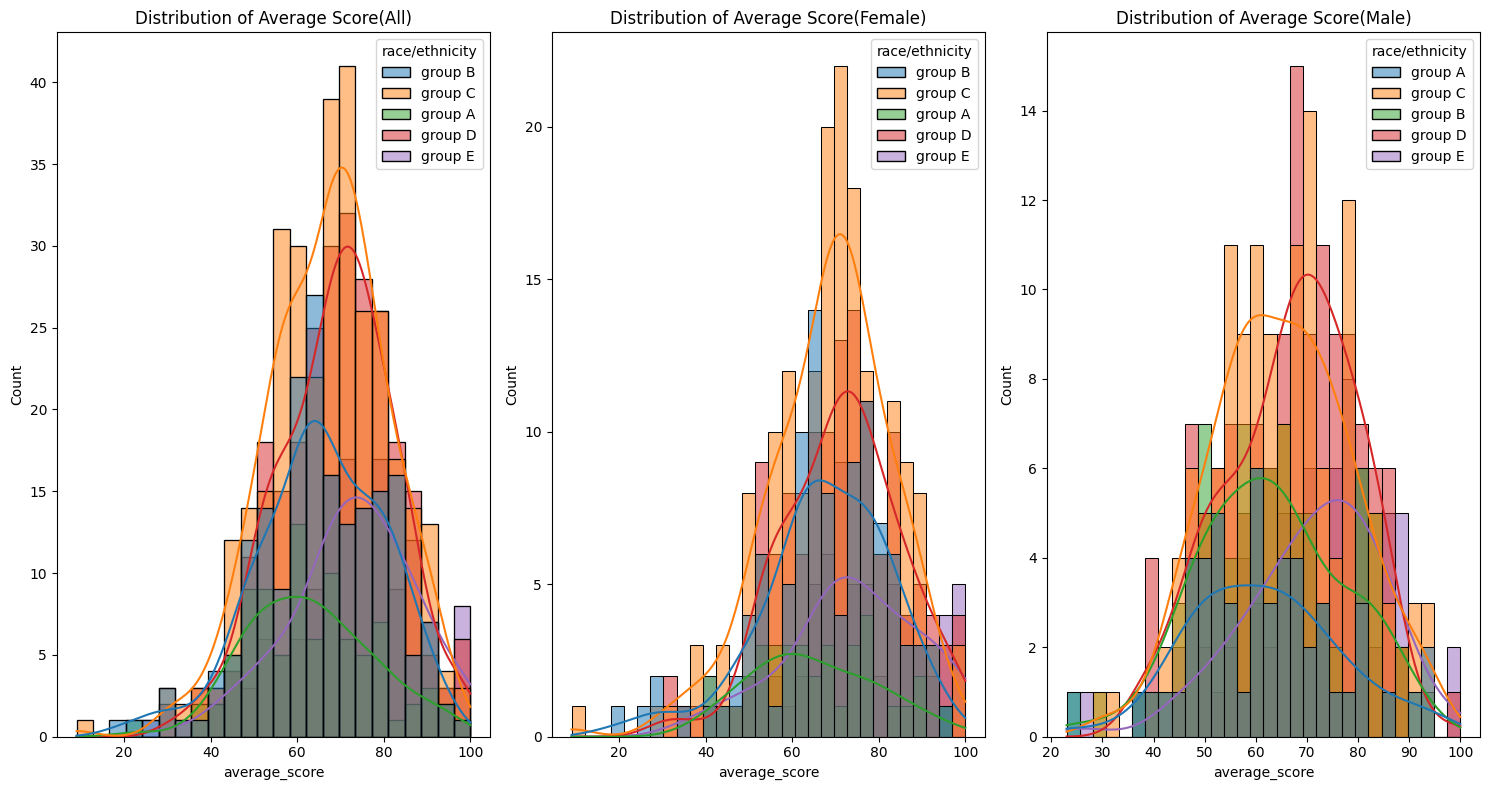

In [108]:
#race/ethnicity
fig, axs = plt.subplots(1,3, figsize=[15,8])
# plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity',color='g',ax=axs[0])
axs[0].set_title("Distribution of Average Score(All)")
# plt.subplot(122)
sns.histplot(data=df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='race/ethnicity',ax=axs[1])
axs[1].set_title("Distribution of Average Score(Female)")
# plt.subplot(123)
sns.histplot(data=df[df['gender']=='male'],x='average_score',bins=30,kde=True, hue='race/ethnicity',ax=axs[2])
axs[2].set_title("Distribution of Average Score(Male)")
plt.tight_layout()
plt.show()

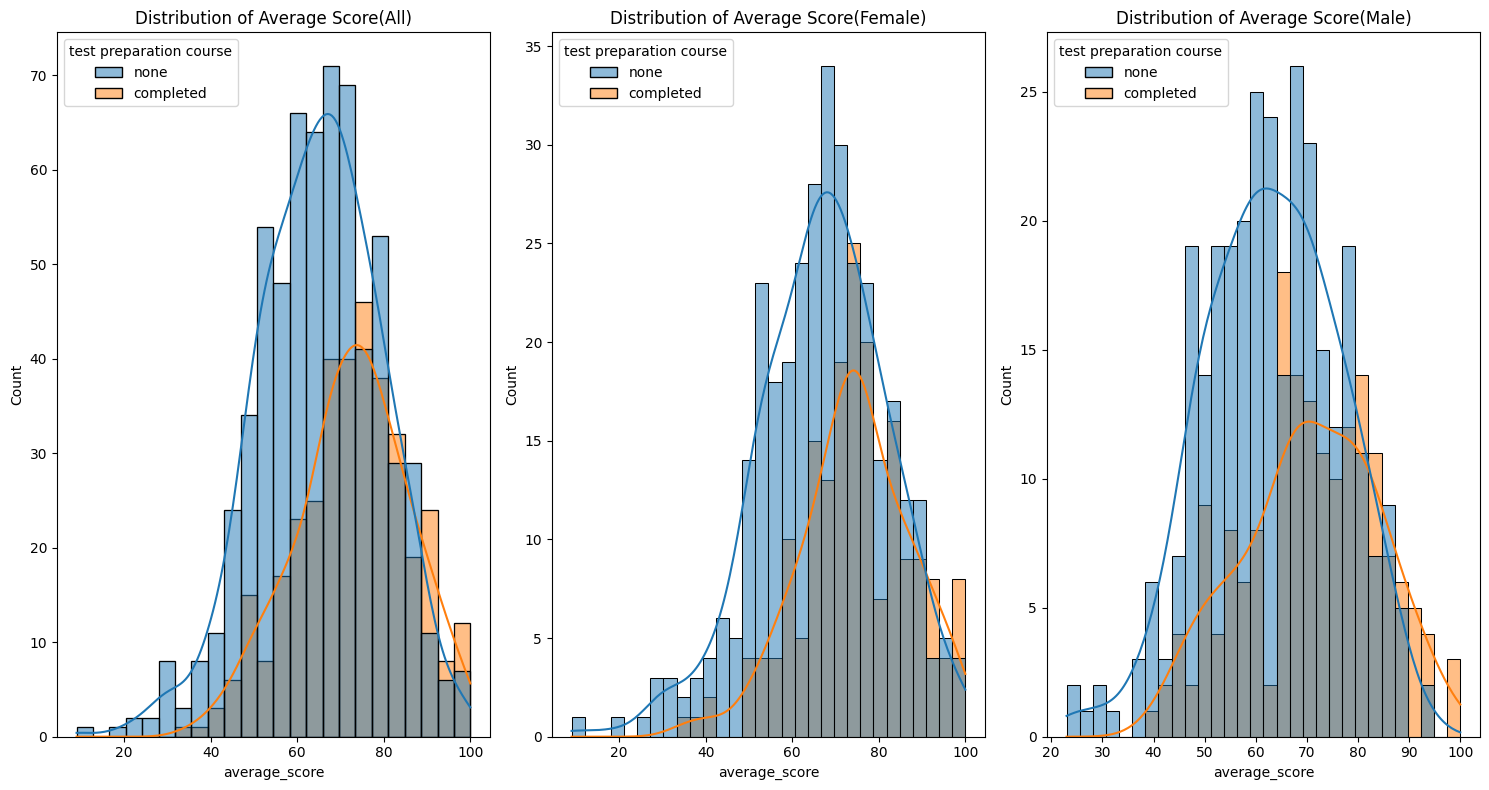

In [109]:
#race/ethnicity
fig, axs = plt.subplots(1,3, figsize=[15,8])
# plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,hue='test preparation course',color='g',ax=axs[0])
axs[0].set_title("Distribution of Average Score(All)")
# plt.subplot(122)
sns.histplot(data=df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='test preparation course',ax=axs[1])
axs[1].set_title("Distribution of Average Score(Female)")
# plt.subplot(123)
sns.histplot(data=df[df['gender']=='male'],x='average_score',bins=30,kde=True, hue='test preparation course',ax=axs[2])
axs[2].set_title("Distribution of Average Score(Male)")
plt.tight_layout()
plt.show()

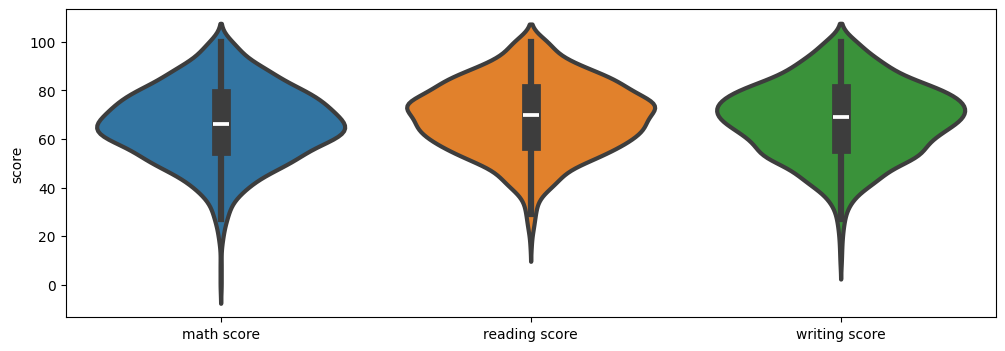

In [120]:
#maximum score for all three subjects
plt.figure(figsize=[12,4])
sns.violinplot(data=df[['math score','reading score','writing score']],linewidth=3)
plt.ylabel('score')
plt.show()

In [121]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.6667
1,female,group C,some college,standard,completed,69,90,88,247,82.3333
2,female,group B,master's degree,standard,none,90,95,93,278,92.6667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3333
4,male,group C,some college,standard,none,76,78,75,229,76.3333


In [122]:
df.to_csv('stud1.csv')